# Effective Way to Handling Imbalance Dataset

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
data=pd.read_csv("framingham.csv") 

In [4]:
data.head() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
data.nunique() 

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [7]:

data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:

missing_columns = ["glucose", "education","BPMeds","totChol","cigsPerDay","BMI","heartRate"]
for i in missing_columns:
    print("Column :", i) 
    print(data[i].nunique())
    print("******************************")

Column : glucose
143
******************************
Column : education
4
******************************
Column : BPMeds
2
******************************
Column : totChol
248
******************************
Column : cigsPerDay
33
******************************
Column : BMI
1363
******************************
Column : heartRate
73
******************************


In [9]:
# using fillna methods to fill all null values
data["glucose"].fillna(data["glucose"].mean(),inplace =True)# fill with mean values
data["totChol"].fillna(data["totChol"].mean(),inplace=True)# fill with mean values
data["cigsPerDay"].fillna(data["cigsPerDay"].mean(),inplace=True)# fill with mean values
data["BMI"].fillna(data["BMI"].mean(),inplace=True)# fill with mean values
data["heartRate"].fillna(data["heartRate"].mean(),inplace=True)# fill with mean values
data["education"].fillna(data["education"].median(),inplace=True)# fill with median values
data["BPMeds"].fillna(data["BPMeds"].median(),inplace=True)# fill with median values

In [10]:
# checking wheather null values is filled or not, false means no null value
data.isnull().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [11]:
data.TenYearCHD.value_counts()# getting unique values in target variable

0    3594
1     644
Name: TenYearCHD, dtype: int64

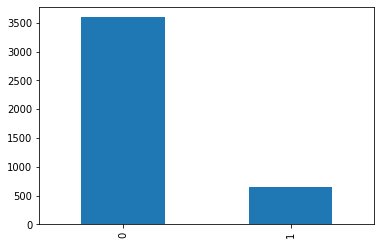

In [12]:
data.TenYearCHD.value_counts().plot(kind="bar")

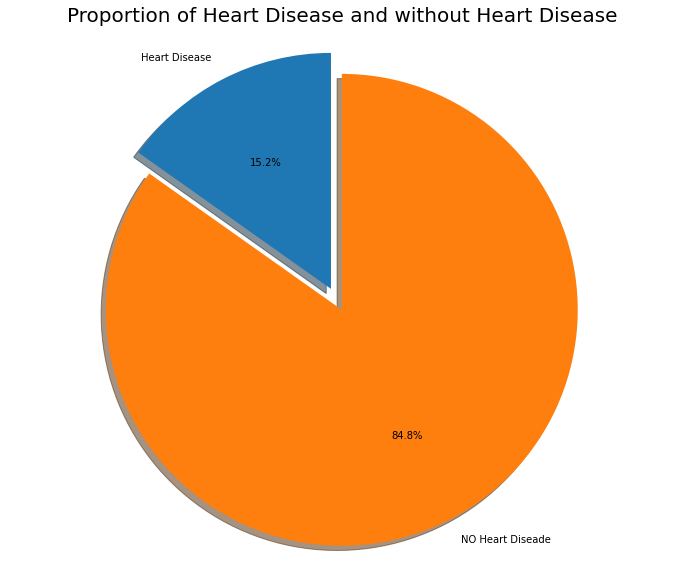

In [13]:
# vizualize our target variable
labels = 'Heart Disease', 'NO Heart Diseade' # labels
sizes = [data.TenYearCHD[data["TenYearCHD"]==1].count(), data.TenYearCHD[data["TenYearCHD"]==0].count()]# count of yes and no
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10)) # figzize
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)# percentage and angle 
ax1.axis('equal')
plt.title("Proportion of Heart Disease and without Heart Disease", size = 20)# plot title
plt.show()

# WITHOUT HANDLING IMBALANCE LABELS

In [14]:
X= data.drop(['TenYearCHD'],axis='columns') 
Y=data.TenYearCHD 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics 
y_pred= model.predict(x_test)
#metrics.accuracy_score(y_test,y_pred)
con_matrix = confusion_matrix(y_test, y_pred) ### confusion matrix
print("Without handling imbalance labels")
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(y_test, y_pred) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test,y_pred) ### accuracy score
print("Accuracy:",acc_score)

Without handling imbalance labels
Confusion Matrix:
[[724   3]
 [119   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       727
           1       0.40      0.02      0.03       121

    accuracy                           0.86       848
   macro avg       0.63      0.51      0.48       848
weighted avg       0.79      0.86      0.80       848

Accuracy: 0.8561320754716981


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Methods 1 - Synthetic Minority Oversampling Technique (SMOTE)

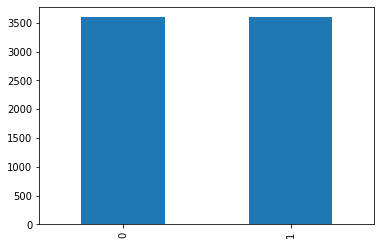

In [16]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_over_sample, Y_over_sample = smote.fit_resample(X,Y) 
plot=Y_over_sample.value_counts().plot(kind='bar')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_over_sample, Y_over_sample, test_size=0.20)

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics 
y_pred= model.predict(x_test)
#metrics.accuracy_score(y_test,y_pred)
con_matrix = confusion_matrix(y_test, y_pred) ### confusion matrix
print("OverSampling the minority class")
print()
print("Confusion Matrix:")
print(con_matrix )
print()
class_report = classification_report(y_test, y_pred) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test,y_pred) ### accuracy score
print("Accuracy:",acc_score)
print()
print("*****************************************************")
print()

OverSampling the minority class

Confusion Matrix:
[[436 284]
 [258 460]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       720
           1       0.62      0.64      0.63       718

    accuracy                           0.62      1438
   macro avg       0.62      0.62      0.62      1438
weighted avg       0.62      0.62      0.62      1438

Accuracy: 0.6230876216968011

*****************************************************



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Methods 2 - Random under-sampling with imblearn

original dataset (Before under sampling): Counter({0: 3594, 1: 644})

Resample dataset shape (After under sampling) Counter({0: 644, 1: 644})



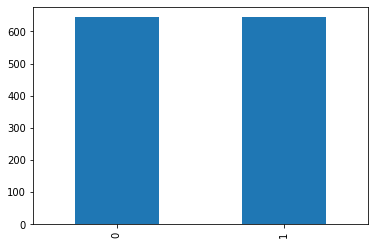

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
under_sample = RandomUnderSampler(random_state=42, replacement=True)
x_under_sample, y_under_sample = under_sample.fit_resample(X,Y)
print('original dataset (Before under sampling):', Counter(Y))
print()
print('Resample dataset shape (After under sampling)', Counter(y_under_sample))
print()
plot=y_under_sample .value_counts().plot(kind='bar')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_under_sample, y_under_sample, test_size=0.20)

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics 
y_pred= model.predict(x_test)
con_matrix = confusion_matrix(y_test, y_pred) 
print("Random under-sampling with imblearn")
print()
print("Confusion Matrix:")
print(con_matrix )
print()
class_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy:",acc_score)


Random under-sampling with imblearn

Confusion Matrix:
[[88 40]
 [48 82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       128
           1       0.67      0.63      0.65       130

    accuracy                           0.66       258
   macro avg       0.66      0.66      0.66       258
weighted avg       0.66      0.66      0.66       258

Accuracy: 0.6589147286821705


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Methods 3 - Random over-sampling with imblearn

original dataset (Before over sampling): Counter({0: 3594, 1: 644})

Resample dataset  (After over sampling) Counter({0: 3594, 1: 3594})



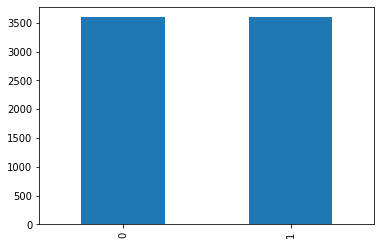

In [22]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sample = RandomOverSampler(random_state=42)
x_over_sample, y_over_sample = over_sample.fit_resample(X,Y)

print('original dataset (Before over sampling):', Counter(Y))
print()
print('Resample dataset  (After over sampling)', Counter(y_over_sample))
print()

plot=y_over_sample.value_counts().plot(kind='bar')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over_sample, y_over_sample, test_size=0.20)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics 
y_pred= model.predict(x_test)
#metrics.accuracy_score(y_test,y_pred)
con_matrix = confusion_matrix(y_test, y_pred) ### confusion matrix
print("Random over-sampling with imblearn")
print()
print("Confusion Matrix:")
print(con_matrix )
print()
class_report = classification_report(y_test, y_pred) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test,y_pred) ### accuracy score
print("Accuracy:",acc_score)
print()
print("*****************************************************")
print()

Random over-sampling with imblearn

Confusion Matrix:
[[468 224]
 [273 473]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       692
           1       0.68      0.63      0.66       746

    accuracy                           0.65      1438
   macro avg       0.66      0.66      0.65      1438
weighted avg       0.66      0.65      0.65      1438

Accuracy: 0.6543810848400556

*****************************************************



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Methods 4 - NearMiss

dataset shape (Before near miss): Counter({0: 3594, 1: 644})

dataset shape(After near miss): Counter({0: 644, 1: 644})



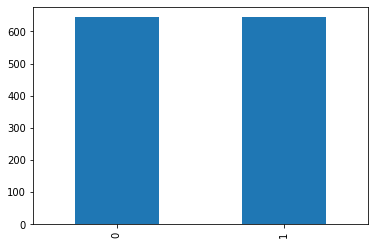

In [24]:
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
x_nm, y_nm = nearmiss.fit_resample(X,Y)
print('dataset shape (Before near miss):', Counter(Y))
print()
print('dataset shape(After near miss):', Counter(y_nm))
print()
plot=y_nm.value_counts().plot(kind='bar')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.20)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics 
y_pred= model.predict(x_test)
#metrics.accuracy_score(y_test,y_pred)
con_matrix = confusion_matrix(y_test, y_pred) ### confusion matrix
print("Near Miss")
print()
print("Confusion Matrix:")
print(con_matrix )
print()
class_report = classification_report(y_test, y_pred) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test,y_pred) ### accuracy score
print("Accuracy:",acc_score)
print()
print("*****************************************************")
print()

Near Miss

Confusion Matrix:
[[101  31]
 [ 47  79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       132
           1       0.72      0.63      0.67       126

    accuracy                           0.70       258
   macro avg       0.70      0.70      0.70       258
weighted avg       0.70      0.70      0.70       258

Accuracy: 0.6976744186046512

*****************************************************



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Methods 5 - Stratified Cross Validation

In [45]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, Y_train, Y_test = train_test_split(X_over_sample, Y_over_sample,
                                                    stratify=Y_over_sample,
                                                    test_size=0.2,
                                                    random_state=42) 

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics 
y_pred= model.predict(X_test)

con_matrix = confusion_matrix(Y_test, y_pred) ### confusion matrix
print("After using stratified")
print()
print("Confusion Matrix:")
print(con_matrix )
print()
class_report = classification_report(Y_test, y_pred) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(Y_test,y_pred) ### accuracy score
print("Accuracy:",acc_score)
print()
print("*****************************************************")
print()

After using stratified

Confusion Matrix:
[[455 264]
 [284 435]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       719
           1       0.62      0.61      0.61       719

    accuracy                           0.62      1438
   macro avg       0.62      0.62      0.62      1438
weighted avg       0.62      0.62      0.62      1438

Accuracy: 0.6189151599443672

*****************************************************



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# ............................................THANK YOU.................